In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


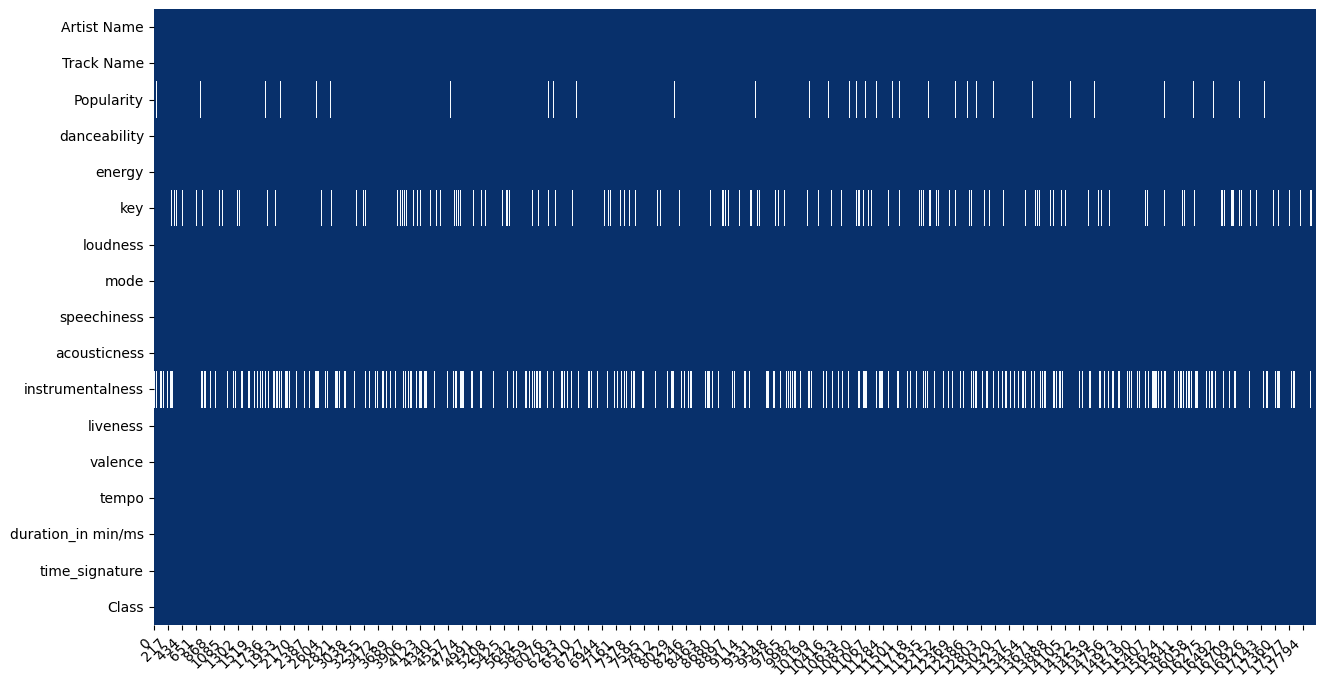

In [4]:
plot_missing_value(df)

<AxesSubplot:>

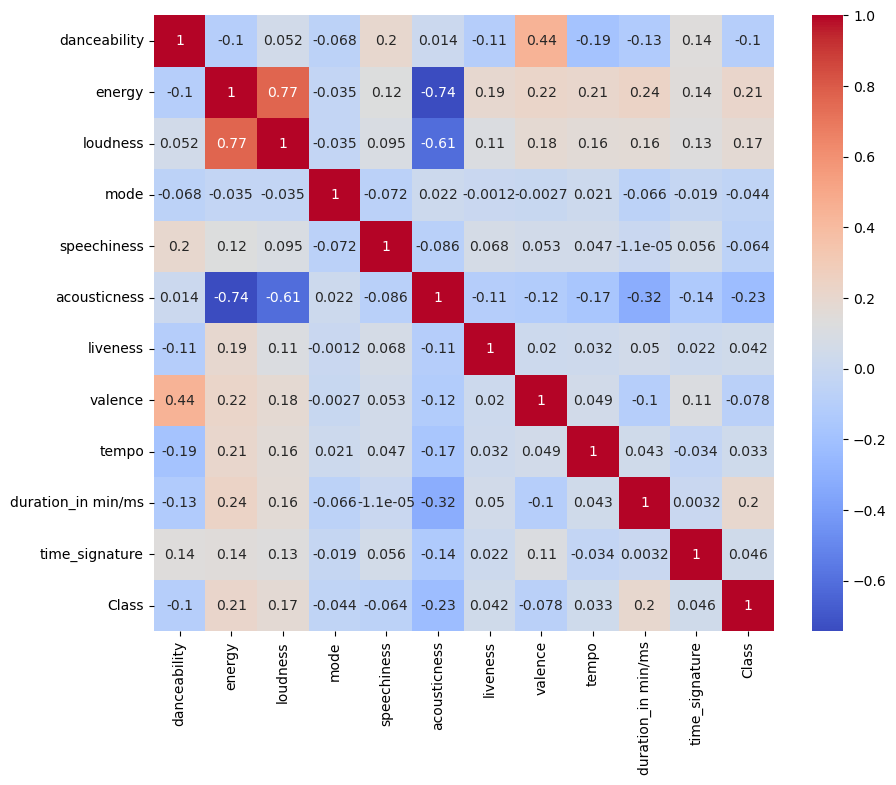

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [5]:
df.drop(columns=["instrumentalness", "key"], inplace=True)
df.dropna(subset=["Popularity"], inplace=True)

In [6]:
df.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [7]:
df.drop(columns=["Track Name"], inplace=True)

In [8]:
df.drop(columns=["Popularity"], inplace=True)

In [9]:
df['Class'].value_counts()

10    4862
6     2544
9     2461
8     1822
5     1425
1     1344
2     1257
0      551
7      547
3      388
4      367
Name: Class, dtype: int64

In [10]:
df['time_signature'].value_counts()

4    16072
3     1186
5      198
1      112
Name: time_signature, dtype: int64

In [11]:
df.columns

Index(['Artist Name', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [12]:
x = df.drop(columns=["Class", "Artist Name", "mode", "time_signature", "tempo", "energy", "time_signature", "loudness", "liveness"])
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12297, 5), (5271, 5), (12297,), (5271,))

In [13]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ['danceability',
       'speechiness', 'acousticness', 'valence', 'duration_in min/ms']),
])

In [14]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

In [3]:
svm_params

Object `rsp.svm_params` not found.


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=5, scoring="precision_macro", n_jobs=-1, verbose=1, random_state=42)
model.fit(x_train, y_train)

print(model.best_params_)
print(model.score(x_train, y_train), model.best_score_, model.score(x_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/ngurahgusti584/miniconda3/envs/tesis/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ngurahgusti584/miniconda3/envs/tesis/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ngurahgusti584/miniconda3/envs/tesis/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ngurahgusti584/miniconda3/envs/tesis/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/ngura

{'algo__C': 4.042872735027338, 'algo__gamma': 17.71884735480683}
0.45982475389458877 0.422308272296954 0.419699839742435


In [19]:
#print classification report from the model
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48       165
           1       0.11      0.14      0.13       403
           2       0.32      0.35      0.33       377
           3       0.59      0.64      0.61       117
           4       0.36      0.48      0.41       110
           5       0.57      0.76      0.66       428
           6       0.25      0.11      0.16       763
           7       0.75      0.81      0.78       164
           8       0.44      0.52      0.48       547
           9       0.35      0.33      0.34       738
          10       0.42      0.41      0.42      1459

    accuracy                           0.40      5271
   macro avg       0.42      0.46      0.44      5271
weighted avg       0.38      0.40      0.38      5271



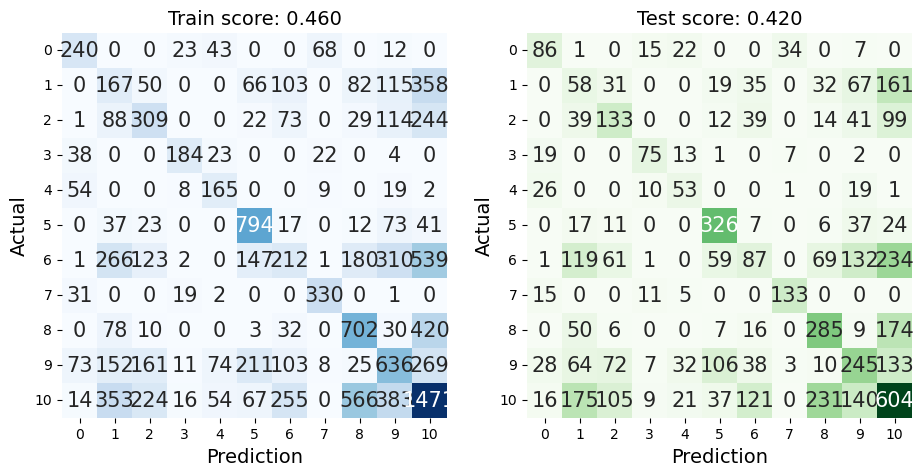

In [18]:
#make confusion matrix from the model to the test data
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train, y_train, x_test, y_test, model)